<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/%D0%98%D0%94%D0%973.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ИДЗ 3. Нечёткие модели.
####Вариант 11.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation
import pylab
%matplotlib inline

**Задание функции**

In [8]:
#Вид функции: f(t) = (t**3) - 37 * (t**2) + 447 * t - 1755 = (t - 9) * (t - 13) * (t - 15)
def f(t):
  return ((t - 9) * (t - 13) * (t - 15))
#Производная функции f(t)
def df(t):
  return (3 * (t**2) - 74 * t + 447)

Вид функции f(t)



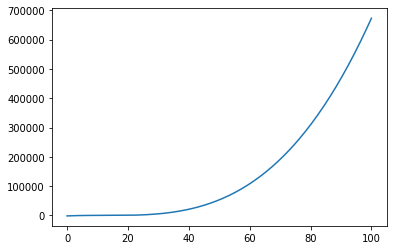

In [15]:
t = np.linspace(0, 100, num = 200)
f_t = f(t)
print('Вид функции f(t)\n')
plt.plot(t, f_t)

**Нахождение уравнений касательных**

In [33]:
#Для примера возьмём из нашей выборки точку под номером 47 и 122
def finding_tangent_equation(num, t0):
  print('Формула касательной имеет вид: y = a * t + b, где')
  print("a = f'(t0)\nb = f(t0) - t0 * f'(t0)")
  a = df(t0)
  b = f(t0) - t0 * df(t0)
  print('При:')
  print("t0 = " + str(round(t0, 4)))
  print('f(t0) = ' + str(round(f(t0), 4)))
  print("f'(t0) = " + str(round(df(t0), 4)))
  print(str(num) + '-е уравнение касательной имеет вид: y = ' + str(round(a, 4)) + ' * t + (' + str(round(b, 4)) + ')\n')
  return a, b

a1, b1 = finding_tangent_equation(1, t[47 - 1])
a2, b2 = finding_tangent_equation(2, t[122 - 1])

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 23.1156
f(t0) = 1158.8009
f'(t0) = 339.4371
1-е уравнение касательной имеет вид: y = 339.4371 * t + (-6687.4829)

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 60.804
f(t0) = 113430.9267
f'(t0) = 7038.8891
2-е уравнение касательной имеет вид: y = 7038.8891 * t + (-314561.8272)



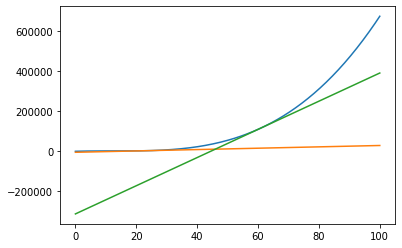

In [34]:
#Функция касательных:
def tangent(a, b, t):
  return (a * t + b)

y1 = tangent(a1, b1, t)
y2 = tangent(a2, b2, t)

plt.plot(t, f_t)
plt.plot(t, y1)
plt.plot(t, y2)

**Найдём у* и построим эти значения вместе с функцией f(t) и двумя касательными**

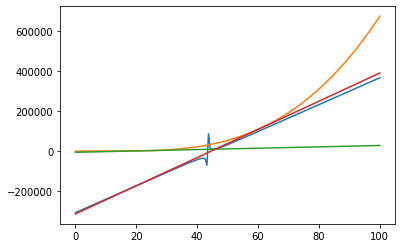

In [36]:
def y_new(t, y1, y2, a1, a2, b1, b2):
  return ((y1 * (a1 * t + b1) + y2 * (a2 * t + b2)) / (y1 + y2))

y_ = y_new(t, y1, y2, a1, a2, b1, b2)
plt.plot(t, y_)
plt.plot(t, f_t)
plt.plot(t, y1)
plt.plot(t, y2)

**Построение mu1 и mu2**

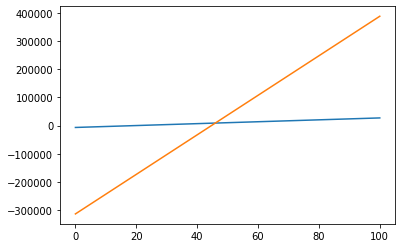

In [46]:
plt.plot([t[0], t[len(t) - 1]], [y1[0], y1[len(y1) - 1]])
plt.plot([t[0], t[len(t) - 1]], [y2[0], y2[len(y1) - 1]])
plt.plot(t[0], 0)
plt.plot(t[len(t) - 1], 0)